# Applying Euclidean distance only to High level features / BoxCox chosen selectively

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt 
import math
from ipynb.fs.full.Utils import createKDeplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from ipynb.fs.full.Pipeline import removeConstantFeatures, applyBoxCoxAllFeatures, centerAndScale, applyEuclideanDistance, getIndexAndVector, applyBoxCoxFeatures

In [22]:
df = pd.read_csv('./data/05-RawData.csv')
encodedFeaturesNames = pd.read_csv('./data/05-encodedFeatureNames.csv')
encodedFeaturesNames = encodedFeaturesNames['0'].values.tolist()

In [23]:
# Separating encodedFeatures from continous features
encodedFeatures = df[encodedFeaturesNames]
featuresToScale = df.drop(encodedFeaturesNames, axis=1)
featuresToScale = featuresToScale.iloc[:, 2:]
df = featuresToScale

In [24]:
df.id = df.id.astype('int64')
# Saving idChords
ids = df.id
df = df.set_index('id')
df.reset_index(drop=True, inplace=True)

In [25]:
df = df[['speechiness' ,'danceability', 'energy', 'acousticness', 'liveness', 'valence', 'tempo']]

In [26]:
df.head(1)

,speechiness,danceability,energy,acousticness,liveness,valence,tempo
0,0.0432,0.494,0.756,0.0014,0.164,0.589,133.337


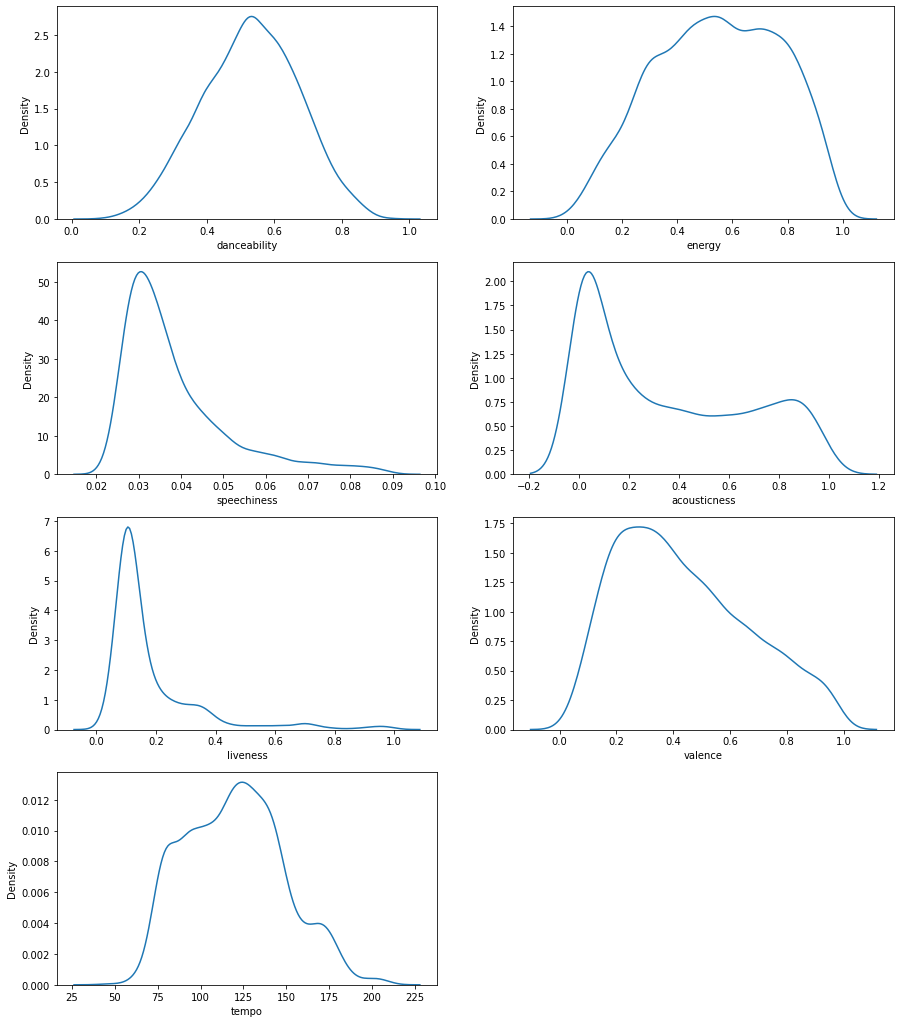

In [27]:
createKDeplot(df,['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'])

## Pipeline

In [28]:
df = removeConstantFeatures(df)
df= applyBoxCoxFeatures(df, ['speechiness', 'acousticness', 'liveness', 'valence'])
df = centerAndScale(df)

### After applying boxcox selectively

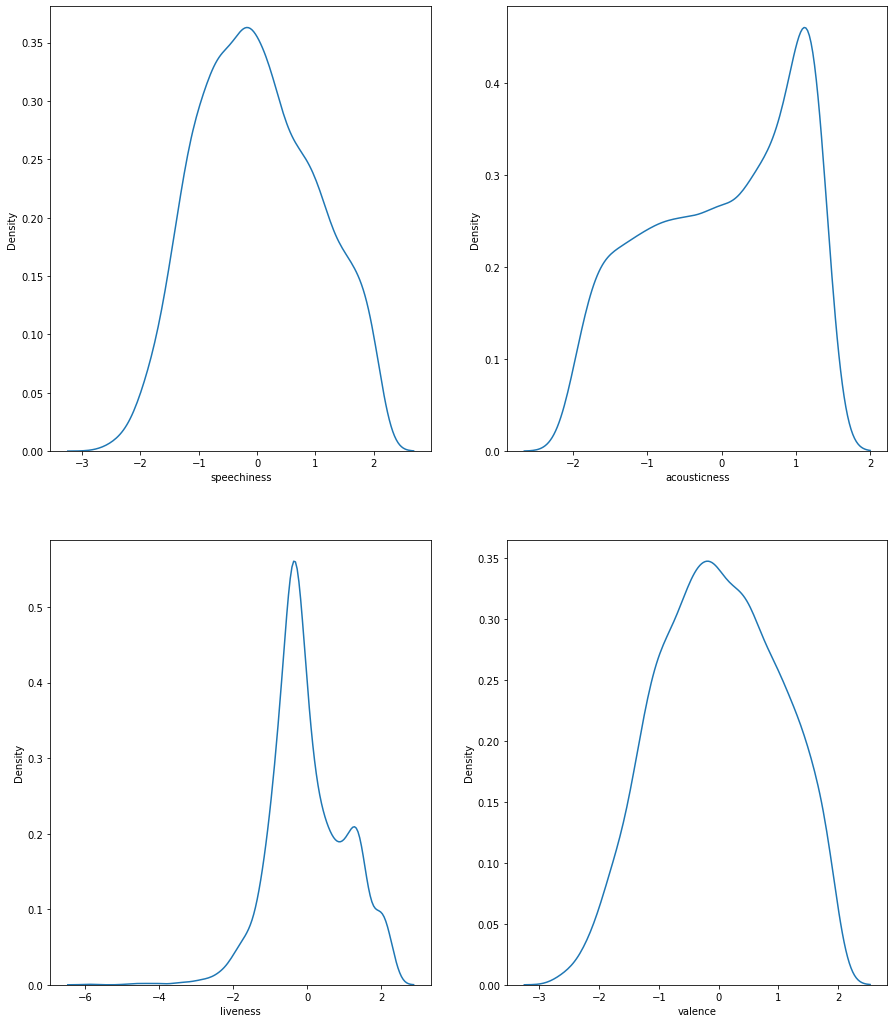

In [29]:
createKDeplot(df,['speechiness', 'acousticness', 'liveness', 'valence'])

### Original Song & Cover Song

In [30]:
originalSongId = 180849 # The Scientist Original
originalSongIndex,originalSongVector = getIndexAndVector(originalSongId, ids, df)
coverSongId = 1686718 # THe Scientist by Boyce Avenue
coverIndex,coverSongVector = getIndexAndVector(coverSongId, ids, df)

### Get Rankings

In [31]:
ranksDF  = applyEuclideanDistance(df, ids, originalSongVector)

In [32]:
ranksDF.head(10)

,id,rank
0,180849,0.000000
1,924061,0.874438
2,188071,0.978993
3,1874688,1.013196
4,1949223,1.036086
5,693612,1.066380
6,1025154,1.124284
7,8279,1.143830
8,263128,1.151139
9,1689019,1.165845


In [33]:
ranksDF[ranksDF['id']==coverSongId]

,id,rank
231,1686718,2.130901


🥳 First recommendation

In [34]:
ranksDF[ranksDF['id'] > 5000000]

,id,rank
23,5000008,1.304862
71,5000023,1.667640
230,5000013,2.130901
286,5000017,2.231969
373,5000011,2.374815
700,5000018,2.785729
746,5000001,2.830145
936,5000020,3.022410
981,5000007,3.067746
1185,5000019,3.246152
